In [293]:
import pandas as pd 

In [294]:
df = pd.read_csv('data/training_data.csv')

In [295]:
## remove all the rows that have a class of 5
df = df[df['class'] != 5]


## Eda

In [296]:
df[df['class'] == 1]

,id,text,class,volunteers_count,judgment_confidence
2,16632,i just need to find ways to feel pretty,1,4.0,0.852762
4,3079,im feeling mellow and am enjoying the cooler w...,1,4.0,0.953162
9,3016,im sure it feels wonderful,1,3.0,0.864743
13,9541,i have survived the low part of the crash im s...,1,3.0,0.813694
20,7839,i prayed to trust god with my desire to feel a...,1,3.0,1.000000
...,...,...,...,...,...
15450,769,i feel very amused at that pic,1,3.0,0.710439
15454,11363,i want to box because i feel more confident in...,1,3.0,0.923899
15457,16850,i feel contented but i m going to bet that i l...,1,4.0,0.799997
15461,5390,i dont feel the need to be truthful its comple...,1,5.0,1.000000


In [297]:
df.head()

,id,text,class,volunteers_count,judgment_confidence
0,366,i would not feel hesitant in using the medical...,4,3.0,0.917835
1,9003,i try to stuff my wildly feeling heart and mes...,0,3.0,0.788853
2,16632,i just need to find ways to feel pretty,1,4.0,0.852762
3,2199,i think the protection part is the part where ...,0,4.0,0.793927
4,3079,im feeling mellow and am enjoying the cooler w...,1,4.0,0.953162


In [298]:
df.columns

Index(['id', 'text', 'class', 'volunteers_count', 'judgment_confidence'], dtype='object')

In [299]:
df.query('text.str.len() <20')

,id,text,class,volunteers_count,judgment_confidence
93,425,Charlie bit me,2,3.0,1.000000
114,8596,i feel so annoyed,3,2.0,1.000000
249,4667,i feel agitated,3,4.0,0.895352
284,1535,i dun feel happy,1,3.0,0.874027
442,8255,Long yellow.,2,6.0,1.000000
...,...,...,...,...,...
15174,11093,i feel so cute,1,2.0,0.960544
15328,7526,fear of thief,4,3.0,0.961709
15393,7208,i feel smart though,1,3.0,0.880569
15416,1585,i do feel confused,4,4.0,1.000000


In [300]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14992 entries, 0 to 15463
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   14992 non-null  int64  
 1   text                 14992 non-null  object 
 2   class                14992 non-null  int64  
 3   volunteers_count     14992 non-null  float64
 4   judgment_confidence  14992 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 702.8+ KB


In [301]:
df.describe()

,id,class,volunteers_count,judgment_confidence
count,14992.000000,14992.000000,14992.000000,14992.000000
mean,9427.327041,1.523279,3.172025,0.881918
std,5452.772805,1.274271,0.774973,0.128695
min,1.000000,0.000000,0.000000,0.322501
25%,4691.500000,0.000000,3.000000,0.788911
50%,9434.500000,1.000000,3.000000,0.923322
75%,14151.500000,2.000000,4.000000,1.000000
max,18858.000000,4.000000,9.000000,1.000000


In [302]:
df['volunteers_count'].unique()

array([ 3.,  4.,  2.,  5.,  1.,  6.,  9.,  7., -0.])

In [303]:
df['judgment_confidence'].unique()

array([0.91783472, 0.78885252, 0.85276185, ..., 0.99387755, 0.77359276,
       0.85195607])

In [304]:
class_counts = df['class'].value_counts()

class_counts

1    4397
0    3826
2    3440
3    1756
4    1573
Name: class, dtype: int64

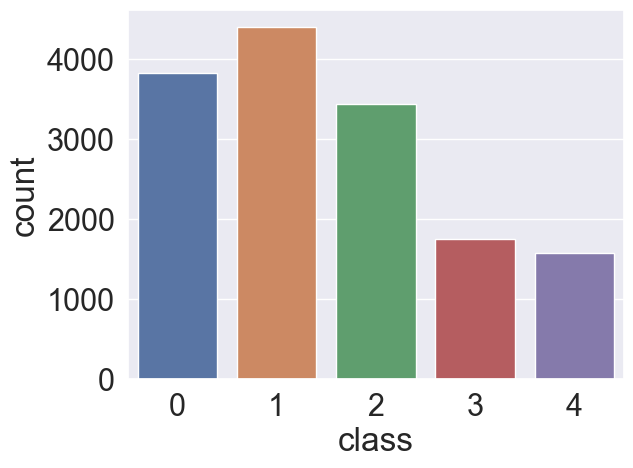

In [305]:

import seaborn as sns
import matplotlib.pyplot as plt



sns.countplot(x='class', data=df)
plt.show()



### Text Preprocessing

In [306]:

import re

def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

def cleanPunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = re.sub(r'&',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def removeSpace(sentence: str) -> str:
    sentence = sentence.strip()
    sentence = sentence.replace("\n"," ")
    return sentence



In [307]:
# df['text'] =df['text'].apply(cleanHtml)
# df['text']= df['text'].apply(cleanPunc)

# df['text'] 

## Removing Stop Words

In [308]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within',])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)

## removing Numbers

In [309]:
def removeNumber(sentence):
    sentence = re.sub(r"\d+", "", sentence)
    return sentence


In [310]:
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)


### Lemmatization



In [311]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

def lemmatizeWord(word):
    return lemmatizer.lemmatize(word)




## Proccessing Text [First  Attempt]

In [312]:
from nltk.tokenize import TweetTokenizer
import nltk




def proccess_text(text):
    text = text.lower()
    ## removing numbers
    text = removeNumber(text)
    ## removing stop words
    text = removeStopWords(text)

    ## clean html
    text = cleanHtml(text)

    ## clean punctuation
    text = cleanPunc(text)


    ## remove space
    text = removeSpace(text)
    

    
    ## tokenizing words
    words = TweetTokenizer()
    ## lemmatizing words
    # words = [lemmatizeWord(word) for word in words.tokenize(text)]
    words = words.tokenize(text)
    text = removeSpace(text)
    return ' '.join(words)



df['text'] = df['text'].apply(proccess_text)

df['text']

0          would feel hesitant using medical system needed
1        try stuff wildly feeling heart messy insides s...
2                               need find ways feel pretty
3        think protection part part feel abused reasons...
4                im feeling mellow enjoying cooler weather
                               ...                        
15459                     really feel beaten us breastfeed
15460    rt @rockprincess : go fight idf progressive tr...
15461        dont feel need truthful completely written me
15462                im feeling pretty discouraged morning
15463                                  feel graceful today
Name: text, Length: 14992, dtype: object

In [313]:
df['text'].iloc[4]

'im feeling mellow enjoying cooler weather'

## Machine Learning Model 

### getting the Test data


In [314]:


df_test = pd.read_csv('data/testing_data.csv')

df_test['text'] = df_test['text'].apply(proccess_text)





## Naive Bayes

In [315]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


from sklearn.model_selection import train_test_split



train , test = train_test_split(df, test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train['text'])
vectorizer.fit(test['text'])

X_train_tfidf = vectorizer.transform(train['text'])
X_test_tfidf = vectorizer.transform(test['text'])



X_train_tfidf

# nb_classifier = MultinomialNB()
# nb_classifier.fit(X_train_tfidf, train['class'])

# y_pred = nb_classifier.predict(X_test_tfidf)

# nb_classifier.score(X_test_tfidf, test['class'])




<11993x51580 sparse matrix of type '<class 'numpy.float64'>'
	with 112146 stored elements in Compressed Sparse Row format>

## XGBoost

In [316]:
%pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [322]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier


train, test = train_test_split(df, test_size=0.2, random_state=42)



text_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1, 3), norm='l2'))
])


full_pipeline = ColumnTransformer([
    ('text', text_pipeline, 'text'),  
])

pipeline_with_xgb = Pipeline([
    ('preprocessing', full_pipeline),
    ('clf', XGBClassifier(
        
    ))  
])

# pipeline_with_xgb.fit(train, train['class'])

# y_pred = pipeline_with_xgb.predict(test)


param_grid = {
    'clf__learning_rate': [0.1, 0.2, 0.3],
    'clf__max_depth': [3, 4, 5],
    'clf__n_estimators': [100, 200, 300]
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline_with_xgb, param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(train, train['class'])

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Make predictions on the test data using the best estimator
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(test)

# Evaluate the model
accuracy = accuracy_score(test['class'], y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(test['class'], y_pred))


Fitting 3 folds for each of 27 candidates, totalling 81 fits


##  Multiple Binary Classifications - (One Vs Rest Classifier)


In [318]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X, y = make_multilabel_classification(n_samples=1000, n_features=20, n_classes=5, n_labels=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

multi_target_rf = MultiOutputClassifier(rf_classifier, n_jobs=-1)

multi_target_rf.fit(X_train, y_train)

y_pred = multi_target_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.46
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.42      0.55        66
           1       0.83      0.78      0.81       102
           2       0.90      0.78      0.84       101
           3       0.86      0.59      0.70        71
           4       0.92      0.30      0.45        37

   micro avg       0.85      0.64      0.73       377
   macro avg       0.86      0.58      0.67       377
weighted avg       0.85      0.64      0.71       377
 samples avg       0.81      0.66      0.70       377



c:\Users\fares\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\fares\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\fares\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

## filling the submission file with the predictions

In [321]:
import csv 
output_df = pd.DataFrame({'id': df_test['id'], 'class': y_pred})

## save to csv
output_df.to_csv('data/output.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)
